In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

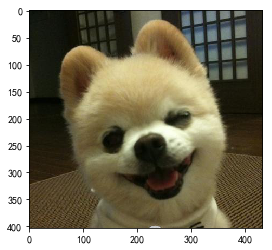

In [2]:
img=cv2.imread(r"E:\ZouBySelf\rotman.jpg") #bgr模式，默认，原图
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)#转成RGB
plt.imshow(img)

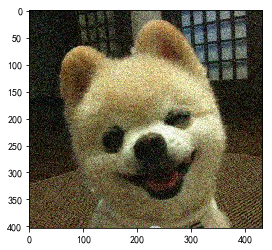

In [3]:
img_gaussian=cv2.imread(r"E:\ZouBySelf\rotman_gaussian.jpg") #加了高斯噪声的图，均值0，方差0.01
img_gaussian=cv2.cvtColor(img_gaussian,cv2.COLOR_BGR2RGB)
plt.imshow(img_gaussian)

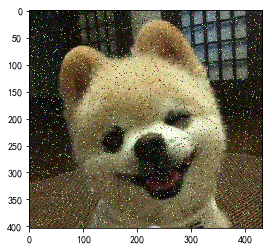

In [4]:
img_saltpep=cv2.imread(r"E:\ZouBySelf\rotman_saltpep.jpg") #加了椒盐噪声的图，噪声密度0.05
img_saltpep=cv2.cvtColor(img_saltpep,cv2.COLOR_BGR2RGB)
plt.imshow(img_saltpep)

### 使用通用卷积函数

In [5]:
kernel=np.ones((5,5),np.float32)/25
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

(<matplotlib.axes._subplots.AxesSubplot at 0x14c48fb2f60>,
 <matplotlib.text.Text at 0x14c48ffc7f0>)

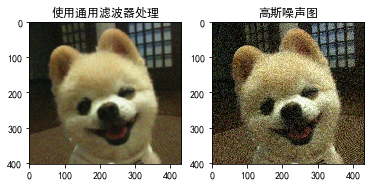

In [6]:
dst=cv2.filter2D(img_gaussian,-1,kernel) 
#-1表示目标图像和原图像深度保持一致，https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#filter2d
plt.subplot('121'),plt.imshow(dst),plt.title('使用通用滤波器处理')
plt.subplot('122'),plt.imshow(img_gaussian),plt.title('高斯噪声图')

### 图像平滑

图像平滑又称图像模糊，借助低通滤波器，常用于去除噪声等高频内容。

#### 邻域平均（均值滤波）

(<matplotlib.axes._subplots.AxesSubplot at 0x14c490c4208>,
 <matplotlib.text.Text at 0x14c49103b38>)

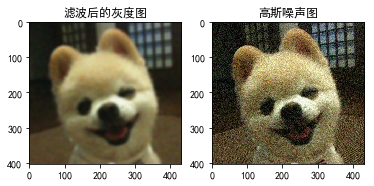

In [7]:
blur = cv2.blur(img_gaussian,(10,10))
plt.subplot('121'),plt.imshow(blur),plt.title('滤波后的灰度图')
plt.subplot('122'),plt.imshow(img_gaussian),plt.title('高斯噪声图')

(<matplotlib.axes._subplots.AxesSubplot at 0x14c491cb7f0>,
 <matplotlib.text.Text at 0x14c49212198>)

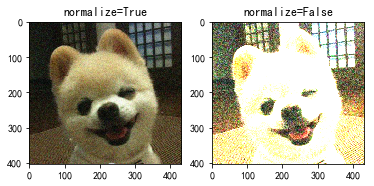

In [8]:
blur2 = cv2.boxFilter(img_gaussian,-1,(2,2),normalize=True) #和上个一样，求和平均
blur3 = cv2.boxFilter(img_gaussian,-1,(2,2),normalize=False) 
#求和，但是不平均，https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html#boxfilter
plt.subplot('121'),plt.imshow(blur2),plt.title('normalize=True')
plt.subplot('122'),plt.imshow(blur3),plt.title('normalize=False')

#### 高斯滤波

常用于消除高斯噪声。

(<matplotlib.axes._subplots.AxesSubplot at 0x14c492d9ba8>,
 <matplotlib.text.Text at 0x14c49323438>)

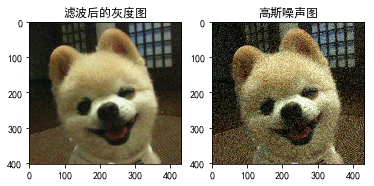

In [9]:
blur4 = cv2.GaussianBlur(img_gaussian,(5,5),0) #第二个参数ksize必须为正奇数
plt.subplot('121'),plt.imshow(blur4),plt.title('滤波后的灰度图')
plt.subplot('122'),plt.imshow(img_gaussian),plt.title('高斯噪声图')

#### 中值（中位数）滤波

常用于消除椒盐噪声。

(<matplotlib.axes._subplots.AxesSubplot at 0x14c493e98d0>,
 <matplotlib.text.Text at 0x14c4942de10>)

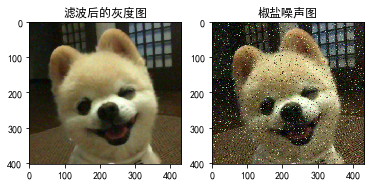

In [10]:
blur5 = cv2.medianBlur(img_saltpep,5)#第二个参数ksize必须为正奇数
plt.subplot('121'),plt.imshow(blur5),plt.title('滤波后的灰度图')
plt.subplot('122'),plt.imshow(img_saltpep),plt.title('椒盐噪声图')

#### 双边滤波

常用的低通滤波器模糊了边缘。双边滤波器在高斯滤波器的基础上，增加了附近亮度值的影响，所有有效避免了边缘信息的消磨。

参考[博客园：图像处理基础(5)：双边滤波器](http://www.cnblogs.com/wangguchangqing/p/6416401.html)

(<matplotlib.axes._subplots.AxesSubplot at 0x14c4956c1d0>,
 <matplotlib.text.Text at 0x14c495a6a58>)

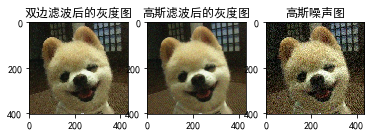

In [11]:
blur6 = cv2.bilateralFilter(img_gaussian,9,75,75)#后3个参数分别是：邻域直径，空间高斯函数标准差和灰度值相似性高斯函数标准差
#https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html#bilateralfilter
plt.subplot('131'),plt.imshow(blur6),plt.title('双边滤波后的灰度图')
plt.subplot('132'),plt.imshow(blur4),plt.title('高斯滤波后的灰度图')
plt.subplot('133'),plt.imshow(img_gaussian),plt.title('高斯噪声图')